In [ ]:
import pandas as pd  # Import the pandas library for data manipulation and analysis

# Load the training dataset
# This dataset contains the comments and their corresponding labels for training the model
train = pd.read_csv('./train.csv')

# Load the test dataset
test = pd.read_csv('./test.csv')

# Load the sample submission file
sample = pd.read_csv('./sample_submission.csv')

# Print a confirmation message to indicate successful loading of the datasets
print("Datasets loaded successfully!")


Datasets loaded successfully!


# Importing Libraries

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.0 MB/s eta 0:00:00


In [ ]:
pip install imbalanced-learn

In [ ]:
## Data Collection and Manipulation
import pandas as pd
import numpy as np

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import re
import emoji

# UnderSampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## Model Creation
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Load the Data

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train.drop("id", axis=1, inplace=True)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \r\n\r\n The title is fine as i...
2,00013b17ad220c46,""" \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_y = pd.read_csv("./test_labels.csv")
test_y.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
test = pd.merge(test, test_y, on = "id")
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \r\n\r\n The title is fine as i...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [ ]:
test = test.drop(test[test["toxic"] == -1].index)
test.drop("id", axis=1, inplace=True)
test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,:Dear god this site is horrible.,0,0,0,0,0,0
11,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,""" \r\n\r\n It says it right there that it IS a...",0,0,0,0,0,0
14,""" \r\n\r\n == Before adding a new product to t...",0,0,0,0,0,0


In [ ]:
target_columns = list(sample.columns.drop('id'))
target_columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train["toxic"].value_counts()

,count
toxic,
0,144277
1,15294


In [ ]:
test["toxic"].value_counts()

,count
toxic,
0,57888
1,6090


In [ ]:
# The counts show an imbalanced dataset, both between labels but also with no label at all:
train[target_columns].sum()

,0
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405


# Exploratory Data Analysis (EDA)

<Axes: xlabel='comment_text'>

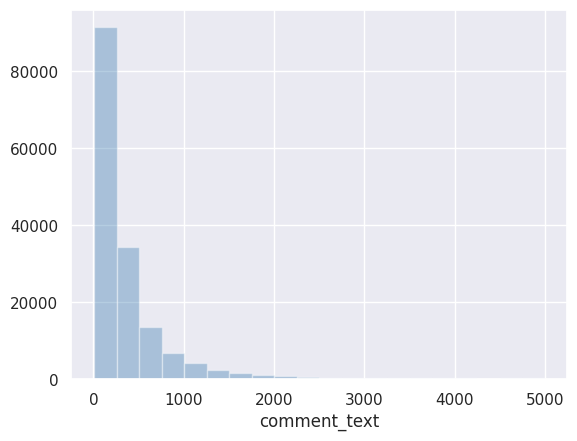

In [ ]:
sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [ ]:
train_labels = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

<Axes: title={'center': 'Labels Frequency'}>

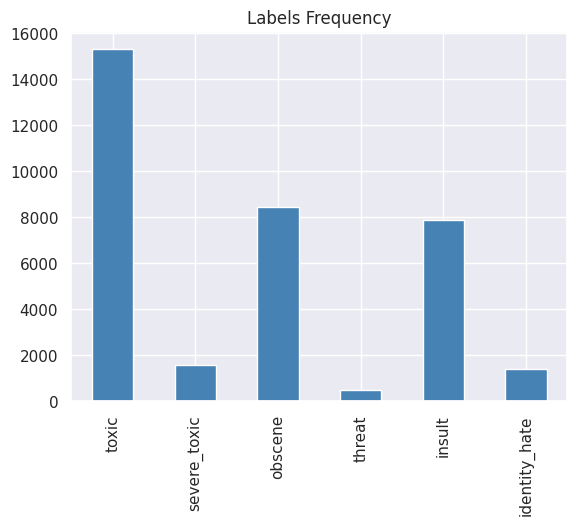

In [ ]:
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

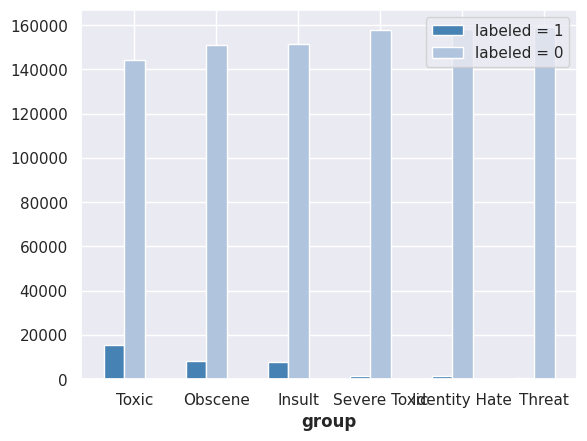

In [ ]:
barWidth = 0.25  # Width of bars in the chart

# Counts of positive (1) and negative (0) labels for each category
bars1 = [sum(train['toxic'] == 1), sum(train['obscene'] == 1), sum(train['insult'] == 1),
         sum(train['severe_toxic'] == 1), sum(train['identity_hate'] == 1), sum(train['threat'] == 1)]
bars2 = [sum(train['toxic'] == 0), sum(train['obscene'] == 0), sum(train['insult'] == 0),
         sum(train['severe_toxic'] == 0), sum(train['identity_hate'] == 0), sum(train['threat'] == 0)]

# Positions for bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Plotting the bar chart
plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

# Adding labels and showing the chart
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],
           ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat'])
plt.legend()
plt.show()


<Axes: >

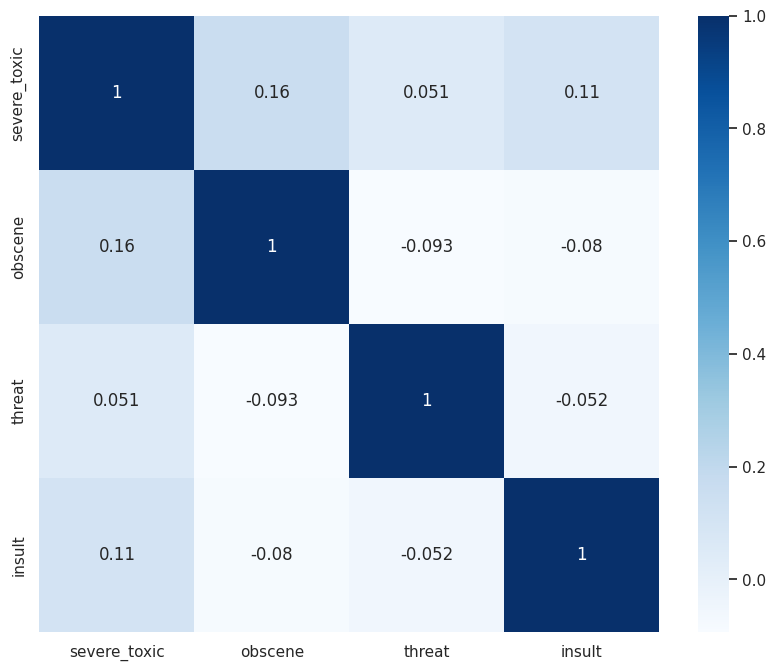

In [ ]:
# Calculate the sum of all label values for each row
rowsums = train.iloc[:, 2:].sum(axis=1)

# Filter the dataset for rows with at least one positive label
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]

# Compute correlation between labels
corr = train_corr.corr()

# Plot the heatmap of label correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap="Blues")


# Data Preprocessing

In [ ]:
train.isnull().sum()

,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
test.isnull().sum()

,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
# Download necessary NLTK resource for lemmatization
import nltk
nltk.download('wordnet')

# Define a text preprocessing function
def preprocess_text(text, remove_repeat_text=True, remove_patterns_text=True, is_lower=True):
    # Convert text to lowercase
    if is_lower:
        text = text.lower()

    # Remove repeated characters (e.g., "heeeello" -> "helo")
    if remove_repeat_text:
        text = re.sub(r'(.)\1{2,}', r'\1', text)

    # If input is a list, join into a single string
    if isinstance(text, list):
        text = ' '.join(text)

    # Replace newline characters with spaces
    text = str(text).replace("\n", " ")

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove numeric characters
    text = re.sub('[0-9]', "", text)

    # Remove extra spaces
    text = re.sub(" +", " ", text)

    # Remove non-ASCII characters
    text = re.sub("([^\x00-\x7F])+", " ", text)

    return text

# Apply the preprocessing function to train and test datasets
train["cleaned_comments"] = train["comment_text"].apply(preprocess_text)
test["cleaned_comments"] = test["comment_text"].apply(preprocess_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train["cleaned_comments"][0]

'explanation\r why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now '

In [ ]:
test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comments
5,Thank you for understanding. I think very high...,0,0,0,0,0,0,thank you for understanding i think very highl...
7,:Dear god this site is horrible.,0,0,0,0,0,0,dear god this site is horrible
11,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0,somebody will invariably try to add religion ...
13,""" \r\n\r\n It says it right there that it IS a...",0,0,0,0,0,0,\r \r it says it right there that it is a typ...
14,""" \r\n\r\n == Before adding a new product to t...",0,0,0,0,0,0,\r \r before adding a new product to the list...


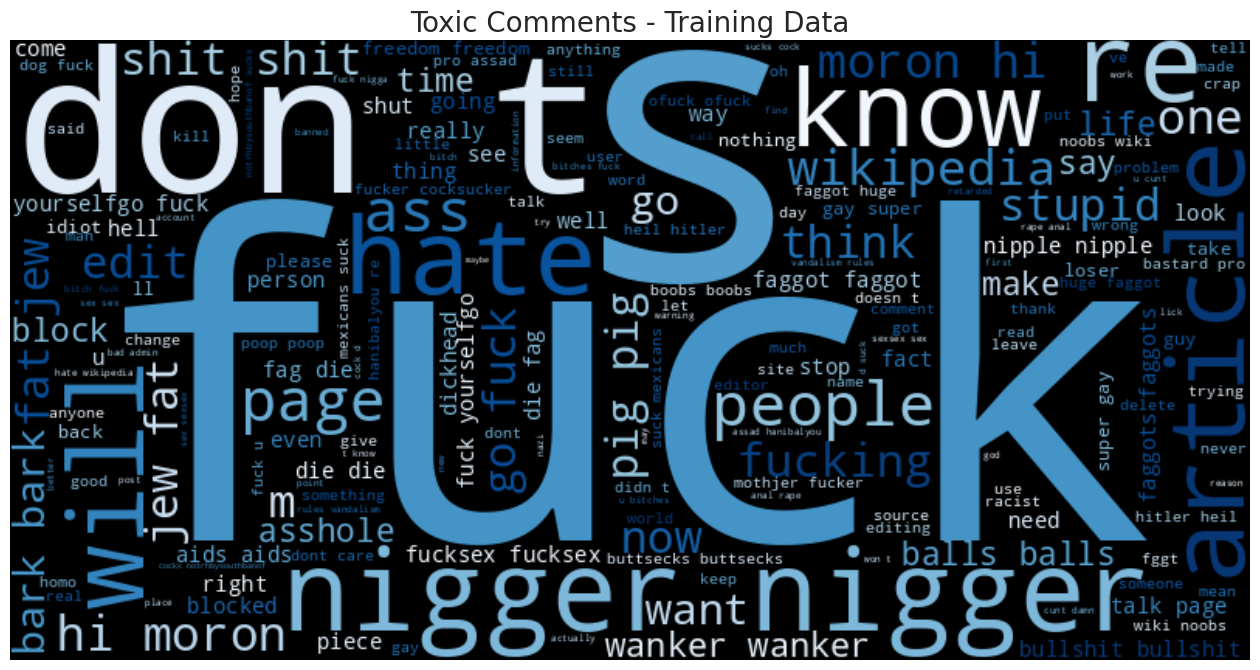

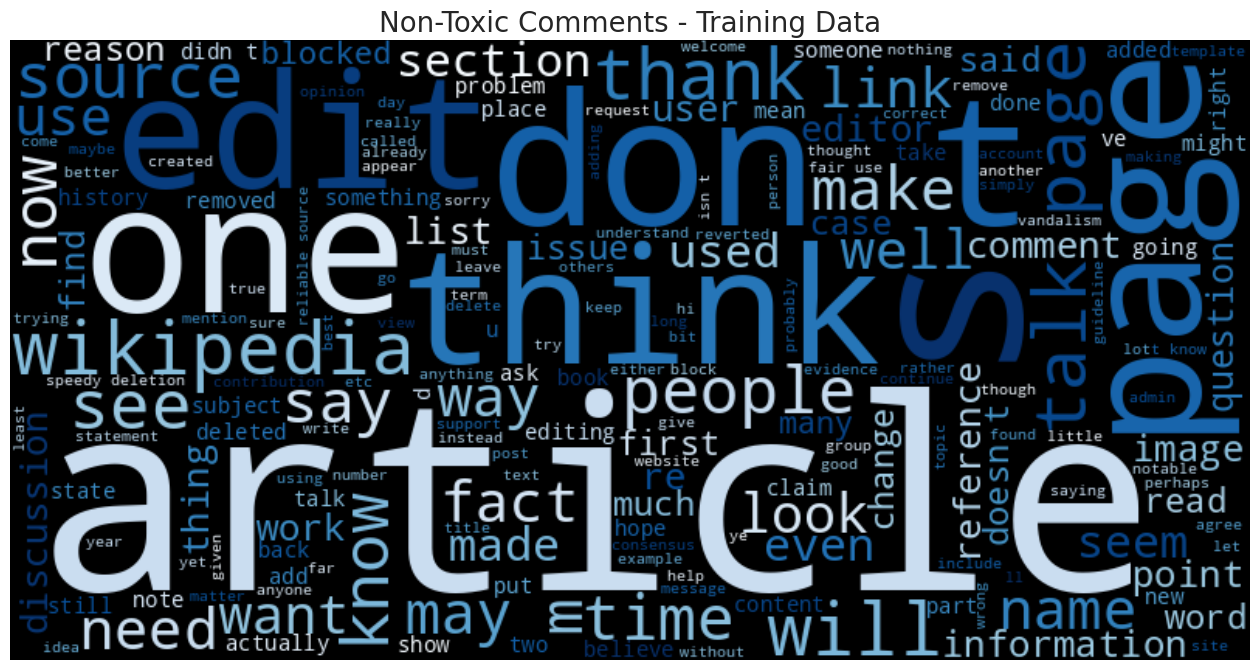

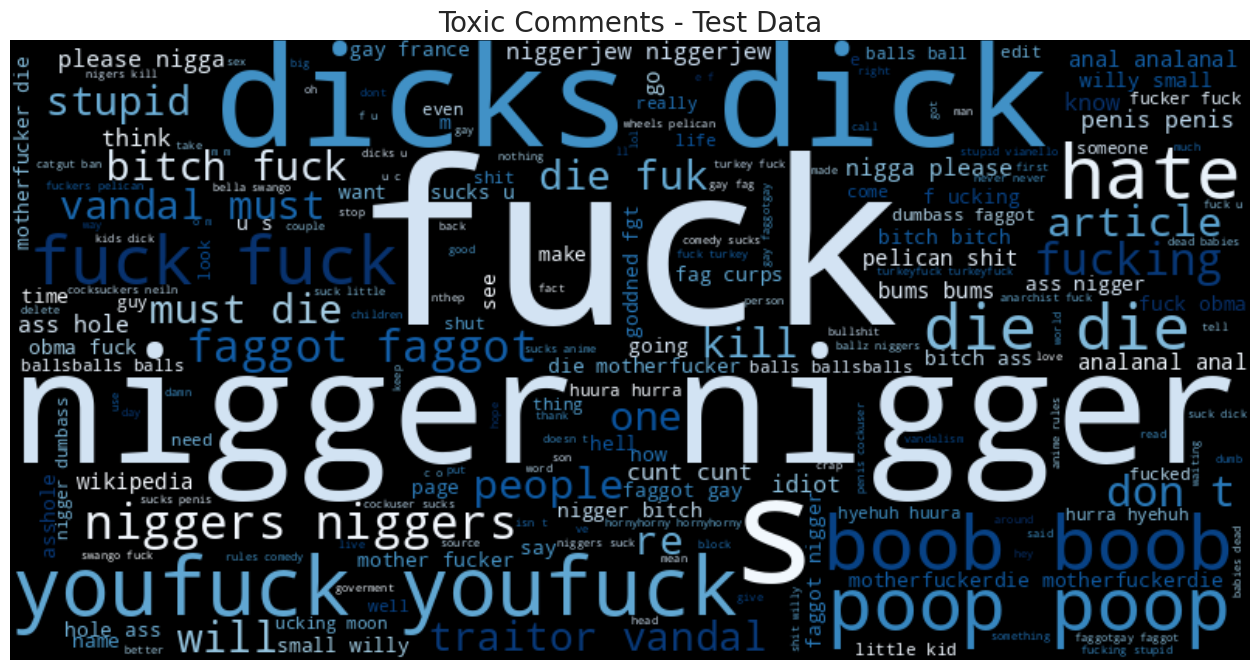

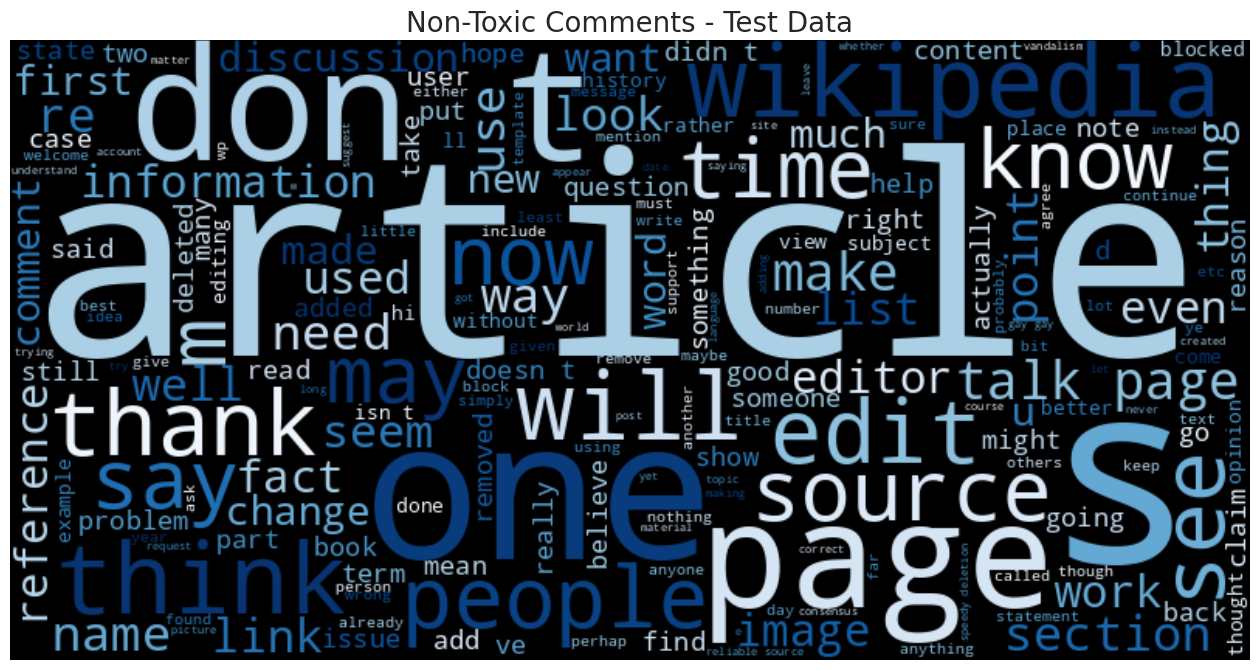

In [ ]:
def generate_wordcloud(data, label):
    text = ' '.join(data[data['toxic'] == label]['cleaned_comments'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    return wordcloud

# Training data word clouds
train_toxic_wordcloud = generate_wordcloud(train, 1)
train_nontoxic_wordcloud = generate_wordcloud(train, 0)

# Test data word clouds
test_toxic_wordcloud = generate_wordcloud(test, 1)
test_nontoxic_wordcloud = generate_wordcloud(test, 0)

# Plot the word clouds
plt.figure(figsize=(16, 12))

plt.imshow(train_toxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Toxic Comments - Training Data', size=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(train_nontoxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Non-Toxic Comments - Training Data', size=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(test_toxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Toxic Comments - Test Data', size=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(test_nontoxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Non-Toxic Comments - Test Data', size=20)
plt.axis('off')
plt.show()


In [ ]:
# Download necessary NLTK resources
nltk.download('omw-1.4')       # Download WordNet for lemmatization
nltk.download('punkt_tab')     # Download tokenizer resources
nltk.download('stopwords')     # Download list of stopwords
nltk.download('wordnet')       # Download WordNet lexical database

# Define stop words and lemmatizer for preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a text preprocessing function
def preprocess_text(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words and convert to lowercase
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens to their base form
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back into a single string
    preprocessed_text = " ".join(lemmatized_tokens)

    return preprocessed_text

# Apply the preprocessing function to train and test datasets
train['comment_text'] = train['cleaned_comments'].apply(preprocess_text)
test['comment_text'] = test['cleaned_comments'].apply(preprocess_text)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train["cleaned_comments"][0]

'explanation\r why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now '

In [ ]:
train["comment_text"][0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired'

# UnderSampling

In [ ]:
X_train = train["comment_text"].values
y_train = np.array(train["toxic"])

In [ ]:
X_test = test["comment_text"].values
y_test = np.array(test["toxic"])

In [ ]:
print("Original training data distribution:", Counter(y_train))

Original training data distribution: Counter({0: 144277, 1: 15294})


In [ ]:
print("Original testing data distribution:", Counter(y_test))

Original testing data distribution: Counter({0: 57888, 1: 6090})


In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
X_resampled_train, y_resampled_train = rus.fit_resample(X_train.reshape(-1, 1), y_train)

In [ ]:
print("Sampling training data distribution:", Counter(y_resampled_train))

Sampling training data distribution: Counter({0: 15294, 1: 15294})


In [ ]:
X_resampled_test, y_resampled_test = rus.fit_resample(X_test.reshape(-1, 1), y_test)

In [ ]:
print("Sampling testing data distribution:", Counter(y_resampled_test))

Sampling testing data distribution: Counter({0: 6090, 1: 6090})


In [ ]:
X_resampled_train = pd.DataFrame(X_resampled_train, columns=["comment_text"])
y_resampled_train = pd.Series(y_resampled_train, name="toxic")

In [ ]:
X_resampled_test = pd.DataFrame(X_resampled_test, columns=["comment_text"])
y_resampled_test = pd.Series(y_resampled_test, name="toxic")

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
y_resampled_train

,toxic
0,0
1,0
2,0
3,0
4,0
...,...
30583,1
30584,1
30585,1
30586,1


In [ ]:
X_resampled_test

,comment_text
0,formatting nice requires lot patience would better u try previous list well though know tedious job u
1,clear answer sort situation tend towards view letting blocked editor find keep creating sockpuppets blocked matter edits stay anyway encourages keep socking whereas letting find waste time whatever sockpuppets get reverted deleted encourages stop reason usually delete situation however see case view useful image still useful even though uploaded violation block criticise take different view editor us pseudonym
2,since edit warring article going time editor often involved reverting banned continuing edit act impact account well two others group ip information seen administrator noticeboard listing permanent link course prevent editing talk page join consensus discussion development article time go editor engage dispute resolution without additional problem restriction may lifted meant endorse particular version article avoid continuous overriding content inappropriate mean resolving dispute problem continues next step may block editor involved shut article editing
3,copyright violation upload others image call infringing copyright edits reverted
4,inserted edit unknown user following passage andrica conjecture rewritten simply state inserted see expression simply simpler provided text please discus
...,...
12175,sorry dickhead cannae help douche bag dumbass bitch boy please would like change lifeless loser
12176,nigel crazy idiot
12177,fourth baldrick possibly cleverer made anyone else share belief proof fourth baldrick stupidity possibly show clever small indeed
12178,iran right iran drone spreading homosexual western idea iran call bone drone get used fabulous bearded mullah let say wording used recent iran incident misleading best people know international airspace start nautical mile coast saying incident supposedly definitely keep supposedly unless believe professional liar spin doctor feed like word dog surprise considering massive influx right wing scum shill provocateur invaded wikipedia past year turned cesspool happened mile iran make sense make sense tell god damned mother fucking truth say supposedly occurred four mile iranian air space usa supposedly using expensive operate piece military equipment surveillance recon open ocean water navy bird watching flora fauna type shit especially close iran extensive military industrial facility leader totally admitted violate iran airspace time continue despite loss drone supposedly hacked whatever happened hello mr semi retired biased rash inflammatory speculative antagonistic sensationalist article cited actually back modification made incident occurred supposedly mile iran air space better source might christian science monitor article recently published issue much thorough lack sensationalism article mr right wing nut job liked eye eye semen


In [ ]:
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_resampled_train["comment_text"],
    y_resampled_train,
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train_resampled

,comment_text
26276,feel argument dumb please feel free disappear miss national bias point day rigged poll ran mega cd page rename non notable yank name without editor aware time respond refute name change another snatch grab name nationalist yank
27921,shut fuck kiss as bitch fuck talking talking suck dick gay tyou
14524,seder sunday show ending sure belongs majority report article sam seder show article last sunday show aar june according website
6632,february utc eh hate marketing speak experience subjective anyway see perceived value generated reading watching otherwise experiencing form medium objective case one may well use medium regardless someone know etymology word add section e mail conversation richard stallman suggested derived noun suffix used nutrition fat content etc wondering whether content sense actually americanism american plural case content often arbitrarily switch singular abstract word content course know asking someone knowledgeable subject write one
7012,rollback october fyi nishidani rollback october
...,...
29802,fuck wish public property
5390,fear day simple computer program take job wife world talk
860,non canonical oz work royal historian title sentence give wrong impression royal historian wrote oz related work generally considered canonical oz fan spoken regard oz book royal historian canonical regard canonicity based whether reilly lee publisher
15795,piss p s bimbo


In [ ]:
X_val_resampled

,comment_text
16303,wack pack fucking insane drunk power instead totally removing big howard stern guy like crackhead bob fred elephant boy remove part majesty find offensive
6576,hornswaggle popular mi spell due juggalo championshit wrestling wrestler named hornswaggling hillbilly
18911,revert lot people work improve wiki motherfucker dare block user user reverted destructive activite shame shitface anna frodesiak
624,happy anniversary frickative hope arrive time see start next five year fine style
7739,note one previous comment knowledge remembrence cage bloody nose national treasure correct wrong fairly sure
...,...
8489,downfall ben ali regime due street action unique modern arab history dubious assertion one well cited autocratic regime good cause worried repercussion begun mahgreb levant
2790,source pilsen wellness center article thank advice use illinois audit edit article pilsen wellness center found medium report discussed audit could please go back rsn comment fox news link thank
29734,thanks hard work look small penis faggot better watch mouth going get knocked fuck wiki fuking pedia watch watch life hit facebook fag
3305,another alternative title would alcohol law


In [ ]:
X_resampled_test

,comment_text
0,formatting nice requires lot patience would better u try previous list well though know tedious job u
1,clear answer sort situation tend towards view letting blocked editor find keep creating sockpuppets blocked matter edits stay anyway encourages keep socking whereas letting find waste time whatever sockpuppets get reverted deleted encourages stop reason usually delete situation however see case view useful image still useful even though uploaded violation block criticise take different view editor us pseudonym
2,since edit warring article going time editor often involved reverting banned continuing edit act impact account well two others group ip information seen administrator noticeboard listing permanent link course prevent editing talk page join consensus discussion development article time go editor engage dispute resolution without additional problem restriction may lifted meant endorse particular version article avoid continuous overriding content inappropriate mean resolving dispute problem continues next step may block editor involved shut article editing
3,copyright violation upload others image call infringing copyright edits reverted
4,inserted edit unknown user following passage andrica conjecture rewritten simply state inserted see expression simply simpler provided text please discus
...,...
12175,sorry dickhead cannae help douche bag dumbass bitch boy please would like change lifeless loser
12176,nigel crazy idiot
12177,fourth baldrick possibly cleverer made anyone else share belief proof fourth baldrick stupidity possibly show clever small indeed
12178,iran right iran drone spreading homosexual western idea iran call bone drone get used fabulous bearded mullah let say wording used recent iran incident misleading best people know international airspace start nautical mile coast saying incident supposedly definitely keep supposedly unless believe professional liar spin doctor feed like word dog surprise considering massive influx right wing scum shill provocateur invaded wikipedia past year turned cesspool happened mile iran make sense make sense tell god damned mother fucking truth say supposedly occurred four mile iranian air space usa supposedly using expensive operate piece military equipment surveillance recon open ocean water navy bird watching flora fauna type shit especially close iran extensive military industrial facility leader totally admitted violate iran airspace time continue despite loss drone supposedly hacked whatever happened hello mr semi retired biased rash inflammatory speculative antagonistic sensationalist article cited actually back modification made incident occurred supposedly mile iran air space better source might christian science monitor article recently published issue much thorough lack sensationalism article mr right wing nut job liked eye eye semen


# Model Building

In [ ]:
import numpy as np
import torch
from sklearn.model_selection import KFold  # For K-fold cross-validation
from sklearn.metrics import roc_auc_score, classification_report  # Evaluation metrics
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset  # PyTorch utilities for data handling
from transformers import BertTokenizer, BertForSequenceClassification, AdamW  # Hugging Face's BERT and optimization tools

# Parameters
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']  # Labels for multi-label classification
k_folds = 5  # Number of folds for cross-validation
batch_size = 16  # Batch size for data loading
epochs = 5  # Number of training epochs

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to encode textual data into token IDs and attention masks for BERT
def encode(data, tokenizer, max_length=150):
    encoded_data = tokenizer.batch_encode_plus(
        data.tolist(),  # Input text
        max_length=max_length,  # Maximum token length for padding/truncation
        padding='max_length',  # Pad sequences to the maximum length
        truncation=True,  # Truncate sequences longer than max_length
        return_tensors='pt'  # Return data as PyTorch tensors
    )
    return encoded_data['input_ids'], encoded_data['attention_mask']  # Return input IDs and attention masks

# Prepare the training and test data
X = train['cleaned_comments'].values  # Input text for training
y = train[target_columns].values  # Target labels for training
X_test = test['cleaned_comments'].values  # Input text for testing
y_test = test[target_columns].values  # Target labels for testing

# Encode test data using BERT tokenizer
X_test_input_ids, X_test_attention_masks = encode(pd.Series(X_test), tokenizer)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)  # Convert test labels to PyTorch tensor

# Create a DataLoader for the test data
test_data = TensorDataset(X_test_input_ids, X_test_attention_masks, y_test_tensor)  # Create a dataset
test_dataloader = DataLoader(test_data, sampler=SequentialSampler(test_data), batch_size=batch_size)  # Use sequential sampling

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)  # Initialize KFold with shuffling and a fixed random state

fold_results = []  # Store results for each fold

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n--- Fold {fold + 1}/{k_folds} ---")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]  # Training and validation inputs
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]  # Training and validation labels

    # Encode training and validation data using the tokenizer
    X_train_input_ids, X_train_attention_masks = encode(pd.Series(X_train_fold), tokenizer)
    X_val_input_ids, X_val_attention_masks = encode(pd.Series(X_val_fold), tokenizer)

    # Convert training and validation labels to PyTorch tensors
    y_train_tensor = torch.tensor(y_train_fold, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_fold, dtype=torch.float32)



--- Fold 1/5 ---

--- Fold 2/5 ---

--- Fold 3/5 ---

--- Fold 4/5 ---

--- Fold 5/5 ---


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

# Batch size for data loading
batch_size = 16

# Create DataLoader for training data
# RandomSampler ensures random shuffling of data during each epoch
train_data = TensorDataset(X_train_input_ids, X_train_attention_masks, y_train_tensor)  # Create dataset
train_dataloader = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size=batch_size)  # DataLoader for training

# Create DataLoader for validation data
# SequentialSampler ensures the validation data is processed in order
val_data = TensorDataset(X_val_input_ids, X_val_attention_masks, y_val_tensor)  # Create dataset
val_dataloader = DataLoader(val_data, sampler=SequentialSampler(val_data), batch_size=batch_size)  # DataLoader for validation


In [ ]:
# import necessary libraries

from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score
from transformers import EarlyStoppingCallback
import numpy as np


In [ ]:
# Define model
# Initialize the BERT model for multi-label classification with pre-trained weights
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(target_columns))
model = model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))  # Move model to GPU if available

# Define optimizer
# AdamW optimizer for fine-tuning with weight decay
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training loop
best_val_loss = float('inf')  # Track the best validation loss for model selection

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()  # Set model to training mode
    total_loss = 0  # Initialize total loss for the epoch

    # Train phase
    for step, batch in enumerate(train_dataloader):
        # Move inputs and labels to the device (GPU or CPU)
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(model.device) for t in batch)
        model.zero_grad()  # Reset gradients
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)  # Forward pass
        loss = outputs.loss  # Compute loss
        total_loss += loss.item()  # Accumulate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

    # Compute and display average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Training Loss: {avg_train_loss:.4f}")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/5
Training Loss: 0.0481

Epoch 2/5
Training Loss: 0.0340

Epoch 3/5
Training Loss: 0.0266

Epoch 4/5
Training Loss: 0.0208

Epoch 5/5
Training Loss: 0.0163


In [ ]:
# Validation phase
model.eval()  # Set the model to evaluation mode
val_loss = 0  # Initialize validation loss
val_preds, val_labels = [], []  # Store predictions and true labels for evaluation

with torch.no_grad():  # Disable gradient computation for validation
    for batch in val_dataloader:
        # Move inputs and labels to the device (GPU or CPU)
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(model.device) for t in batch)

        # Forward pass to get predictions and loss
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        val_loss += outputs.loss.item()  # Accumulate validation loss

        # Store predictions and labels for metrics calculation
        val_preds.append(torch.sigmoid(outputs.logits).cpu().numpy())  # Convert logits to probabilities
        val_labels.append(batch_labels.cpu().numpy())

# Compute average validation loss
avg_val_loss = val_loss / len(val_dataloader)
print(f"Validation Loss: {avg_val_loss:.4f}")

# Save the best model for this fold if validation loss improves
if avg_val_loss < best_val_loss:
    best_val_loss = avg_val_loss  # Update the best validation loss
    torch.save(model.state_dict(), f"best_model_fold_{fold}.pth")  # Save the model's state dictionary


Validation Loss: 0.0531


In [ ]:
# Evaluate validation set
val_preds = np.vstack(val_preds)  # Stack validation predictions vertically
val_labels = np.vstack(val_labels)  # Stack validation true labels vertically
fold_val_auc = roc_auc_score(val_labels, val_preds, average='macro')  # Compute macro-average AUC for validation
print(f"Fold {fold + 1} Validation AUC: {fold_val_auc:.4f}")

# Load the best model for this fold and evaluate it on the test set
model.load_state_dict(torch.load(f"best_model_fold_{fold}.pth"))  # Load the saved best model for this fold
model.eval()  # Set the model to evaluation mode
test_preds, test_labels = [], []  # Initialize lists to store test predictions and true labels

with torch.no_grad():  # Disable gradient computation during test evaluation
    for batch in test_dataloader:
        # Move inputs and labels to the device (GPU or CPU)
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(model.device) for t in batch)

        # Forward pass to get predictions
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        test_preds.append(torch.sigmoid(outputs.logits).cpu().numpy())  # Convert logits to probabilities
        test_labels.append(batch_labels.cpu().numpy())  # Store true labels

# Stack predictions and labels for test evaluation
test_preds = np.vstack(test_preds)
test_labels = np.vstack(test_labels)

# Compute macro-average AUC for the test set
fold_test_auc = roc_auc_score(test_labels, test_preds, average='macro')
print(f"Fold {fold + 1} Test AUC: {fold_test_auc:.4f}")

# Append the fold's validation and test AUC scores to the results list
fold_results.append((fold_val_auc, fold_test_auc))

# Compute overall validation and test results across all folds
val_aucs = [result[0] for result in fold_results]  # Extract validation AUCs
test_aucs = [result[1] for result in fold_results]  # Extract test AUCs
print(f"\nOverall Validation AUC: {np.mean(val_aucs):.4f} ± {np.std(val_aucs):.4f}")  # Average and std for validation AUCs
print(f"Overall Test AUC: {np.mean(test_aucs):.4f} ± {np.std(test_aucs):.4f}")  # Average and std for test AUCs


Fold 5 Validation AUC: 0.9865
Fold 5 Test AUC: 0.9821

Overall Validation AUC: 0.9865 ± 0.0000
Overall Test AUC: 0.9821 ± 0.0000


In [ ]:
# Multi-label classification report and metrics
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

# Define target column names (multi-label classification)
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Evaluate the model on the test data
model.eval()  # Set the model to evaluation mode
test_preds, test_labels = [], []  # Initialize lists for predictions and true labels
with torch.no_grad():  # Disable gradient computation for efficiency
    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(model.device) for t in batch)
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)  # Forward pass
        logits = outputs.logits  # Raw logits from the model
        test_preds.append(torch.sigmoid(logits).cpu().numpy())  # Convert logits to probabilities
        test_labels.append(batch_labels.cpu().numpy())  # Store true labels

# Convert predictions and labels to arrays for metrics calculation
test_preds = np.vstack(test_preds)
test_labels = np.vstack(test_labels)

# Initialize macro-average AUC and thresholds for optimal F1
macro_auc = 0
optimal_thresholds = []  # Store the best threshold for each label

print("\nClassification Reports for Each Label:")
for i, label in enumerate(target_columns):
    print(f"\nLabel: {label}")
    true_labels = test_labels[:, i]  # True labels for the current label
    predicted_probs = test_preds[:, i]  # Predicted probabilities for the current label

    # Determine optimal threshold using the precision-recall curve
    precision, recall, thresholds = precision_recall_curve(true_labels, predicted_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Compute F1 scores
    optimal_idx = f1_scores.argmax()  # Index of the maximum F1 score
    optimal_threshold = thresholds[optimal_idx] if len(thresholds) > 0 else 0.5  # Set threshold
    optimal_thresholds.append(optimal_threshold)

    # Predict labels using the optimal threshold
    predicted_labels = (predicted_probs > optimal_threshold).astype(int)

    # Generate and display the classification report
    print(classification_report(true_labels, predicted_labels, target_names=[f"Non-{label}", label]))

    # Calculate the AUC score for the current label
    auc = roc_auc_score(true_labels, predicted_probs)
    print(f"AUC: {auc:.4f}")
    print(f"Optimal Threshold for {label}: {optimal_threshold:.2f}")
    macro_auc += auc  # Accumulate macro AUC

# Calculate Macro-Average AUC across all labels
macro_auc /= len(target_columns)

# Calculate overall metrics using optimized thresholds
predicted_labels = np.zeros_like(test_preds)  # Initialize predictions
for i in range(test_preds.shape[1]):
    predicted_labels[:, i] = (test_preds[:, i] > optimal_thresholds[i]).astype(int)  # Apply optimal thresholds

# Flatten predictions and true labels for overall metrics calculation
accuracy = accuracy_score(test_labels.flatten(), predicted_labels.flatten())
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')

# Print overall metrics
print(f"\nOverall Metrics (Using Tuned Thresholds):")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Macro Average AUC: {macro_auc:.4f}")



Classification Reports for Each Label:

Label: toxic
              precision    recall  f1-score   support

   Non-toxic       0.98      0.96      0.97     57888
       toxic       0.65      0.78      0.71      6090

    accuracy                           0.94     63978
   macro avg       0.82      0.87      0.84     63978
weighted avg       0.95      0.94      0.94     63978

AUC: 0.9686
Optimal Threshold for toxic: 0.81

Label: severe_toxic
                  precision    recall  f1-score   support

Non-severe_toxic       1.00      0.99      1.00     63611
    severe_toxic       0.33      0.55      0.41       367

        accuracy                           0.99     63978
       macro avg       0.66      0.77      0.70     63978
    weighted avg       0.99      0.99      0.99     63978

AUC: 0.9883
Optimal Threshold for severe_toxic: 0.49

Label: obscene
              precision    recall  f1-score   support

 Non-obscene       0.98      0.98      0.98     60287
     obscene       0.70

In [ ]:
# Save Model
torch.save(model.state_dict(), "bert_toxicity_model.pth")
tokenizer.save_pretrained('./bert_tokenizer')

('./bert_tokenizer/tokenizer_config.json',
 './bert_tokenizer/special_tokens_map.json',
 './bert_tokenizer/vocab.txt',
 './bert_tokenizer/added_tokens.json')

In [ ]:
def predict_toxicity(text, model, tokenizer, target_columns, optimal_thresholds, max_length=150):
    """
    Predict whether a given text is toxic or non-toxic using a fine-tuned BERT model.

    Args:
        text (str): Input text to be classified.
        model: Fine-tuned BERT model.
        tokenizer: Tokenizer used for the BERT model.
        target_columns (list): List of target labels.
        optimal_thresholds (list): Thresholds tuned for each label.
        max_length (int): Maximum token length for BERT input.

    Returns:
        dict: A dictionary containing the toxicity classification for each label.
    """
    model.eval()  # Set the model to evaluation mode

    # Tokenize and preprocess the input text
    encoded_input = tokenizer(
        text,                     # Input text to be tokenized
        max_length=max_length,    # Truncate or pad to this length
        padding="max_length",     # Add padding if text length is less than max_length
        truncation=True,          # Truncate text if it exceeds max_length
        return_tensors="pt"       # Return data as PyTorch tensors
    )
    input_ids = encoded_input['input_ids'].to(model.device)  # Move input IDs to the model's device
    attention_mask = encoded_input['attention_mask'].to(model.device)  # Move attention mask to the model's device

    # Perform forward pass to get predictions
    with torch.no_grad():  # Disable gradient calculation for efficiency
        outputs = model(input_ids, attention_mask=attention_mask)  # Get model outputs
        logits = outputs.logits  # Extract logits
        probabilities = torch.sigmoid(logits).cpu().numpy()[0]  # Apply sigmoid to get probabilities

    # Determine if each label is toxic based on optimal thresholds
    prediction = {}
    for i, label in enumerate(target_columns):  # Iterate through each label
        is_toxic = probabilities[i] > optimal_thresholds[i]  # Compare probability with the threshold
        prediction[label] = "Toxic" if is_toxic else "Non-Toxic"  # Assign "Toxic" or "Non-Toxic"

    return prediction  # Return the predictions as a dictionary

# Example Usage
text = "You are an asshole!"
predictions = predict_toxicity(text, model, tokenizer, target_columns, optimal_thresholds)
print(f"Predictions for '{text}':")
for label, result in predictions.items():
    print(f"{label}: {result}")  # Print predictions for each label


Predictions for 'You are an asshole!':
toxic: Toxic
severe_toxic: Non-Toxic
obscene: Toxic
threat: Non-Toxic
insult: Toxic
identity_hate: Non-Toxic


In [ ]:
def predict_toxicity(text, model, tokenizer, target_columns, optimal_thresholds, max_length=150):
    """
    Predict whether a given text is toxic or non-toxic using a fine-tuned BERT model.

    Args:
        text (str): Input text to be classified.
        model: Fine-tuned BERT model.
        tokenizer: Tokenizer used for the BERT model.
        target_columns (list): List of target labels.
        optimal_thresholds (list): Thresholds tuned for each label.
        max_length (int): Maximum token length for BERT input.

    Returns:
        dict: A dictionary containing the toxicity classification for each label.
    """
    model.eval()  # Set the model to evaluation mode

    # Tokenize and preprocess the input text
    encoded_input = tokenizer(
        text,                     # Input text to be tokenized
        max_length=max_length,    # Truncate or pad to this length
        padding="max_length",     # Add padding if text length is less than max_length
        truncation=True,          # Truncate text if it exceeds max_length
        return_tensors="pt"       # Return data as PyTorch tensors
    )
    input_ids = encoded_input['input_ids'].to(model.device)  # Move input IDs to the model's device
    attention_mask = encoded_input['attention_mask'].to(model.device)  # Move attention mask to the model's device

    # Perform forward pass to get predictions
    with torch.no_grad():  # Disable gradient calculation for efficiency
        outputs = model(input_ids, attention_mask=attention_mask)  # Get model outputs
        logits = outputs.logits  # Extract logits
        probabilities = torch.sigmoid(logits).cpu().numpy()[0]  # Apply sigmoid to get probabilities

    # Determine if each label is toxic based on optimal thresholds
    prediction = {}
    for i, label in enumerate(target_columns):  # Iterate through each label
        is_toxic = probabilities[i] > optimal_thresholds[i]  # Compare probability with the threshold
        prediction[label] = "Toxic" if is_toxic else "Non-Toxic"  # Assign "Toxic" or "Non-Toxic"

    return prediction  # Return the predictions as a dictionary

# Example Usage
text = "You've done a fabulous job"
predictions = predict_toxicity(text, model, tokenizer, target_columns, optimal_thresholds)
print(f"Predictions for '{text}':")
for label, result in predictions.items():
    print(f"{label}: {result}")  # Print predictions for each label


Predictions for 'You’ve done a fabulous job':
toxic: Non-Toxic
severe_toxic: Non-Toxic
obscene: Non-Toxic
threat: Non-Toxic
insult: Non-Toxic
identity_hate: Non-Toxic
